In [2]:
# import packages
import os
import tarfile
import urllib
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

TEAM_PATH = './resources/scores.csv'

In [7]:
def load_data(path=TEAM_PATH, frame=None):
    if pd:
        frame.append(pd.read_csv(path,header=0))
        
    else:
        return pd.read_csv(path,header=0)

In [ ]:
urls = [
    'resources/scores(0).csv',
    'resources/scores(1).csv',
    'resources/scores(2).csv',
    'resources/scores(3).csv',
    'resources/scores(4).csv',
    'resources/scores(5).csv',
    'resources/scores(6).csv',
]



In [4]:
def scatter_plot(df, label_column):
    sns.set(style="ticks")
    num_cols = df.select_dtypes(include=np.number).columns
    num_cols = [col for col in num_cols if col != label_column]
    
    ncols = 3
    nrows = np.ceil(len(num_cols) / ncols).astype(int)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 7))
    ax = ax.flatten()
    
    for i, col in enumerate(num_cols):
        sns.scatterplot(x=df[col], y=df[label_column], ax=ax[i])
        ax[i].set_xlabel(col)
        ax[i].set_ylabel(label_column)
        
    plt.tight_layout()
    plt.show()

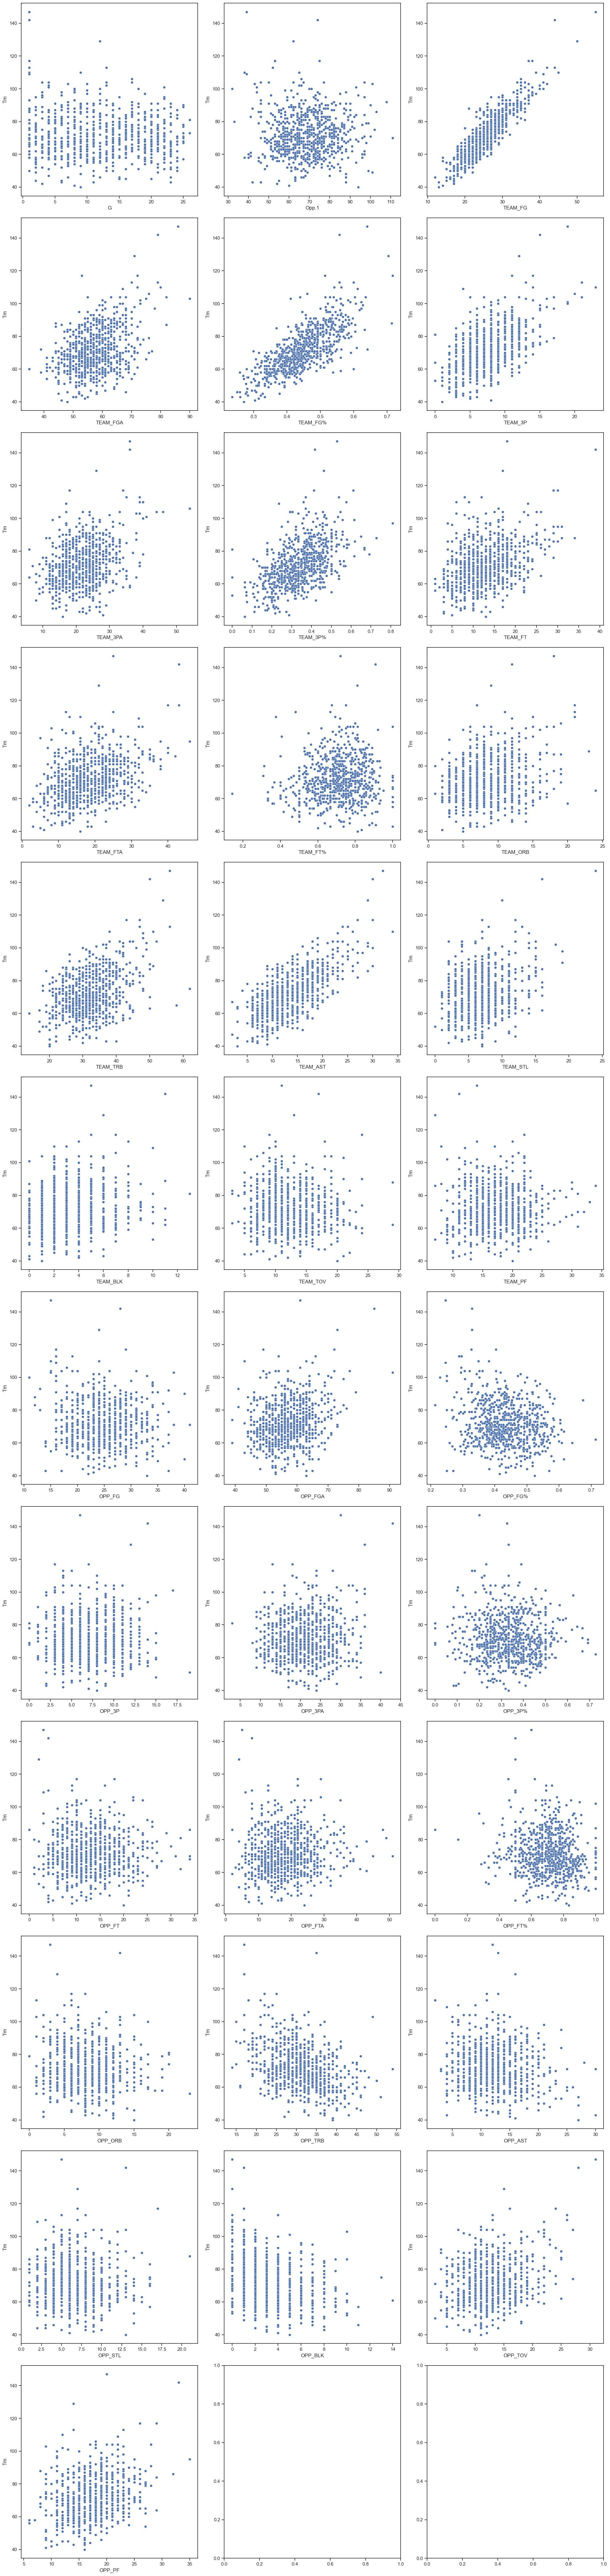

In [5]:
teamData = load_data()
teamData.head()
labels = teamData["Tm"].copy().values

scatter_plot(teamData, "Tm")

In [6]:
teamData.corr()

C:\Users\rykun\AppData\Local\Temp\ipykernel_29384\77593277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teamData.corr()


,G,Tm,Opp.1,TEAM_FG,TEAM_FGA,TEAM_FG%,TEAM_3P,TEAM_3PA,TEAM_3P%,TEAM_FT,...,OPP_FT,OPP_FTA,OPP_FT%,OPP_ORB,OPP_TRB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV,OPP_PF
G,1.000000,-0.073488,0.026236,-0.076060,-0.137463,0.015627,-0.026400,-0.067144,0.024658,-0.017609,...,-0.036179,-0.070331,0.069613,-0.037499,-0.050116,-0.008047,-0.086328,0.029599,-0.235305,-0.092145
Tm,-0.073488,1.000000,-0.013100,0.888984,0.392311,0.736913,0.585262,0.304278,0.507210,0.379602,...,0.002092,0.039680,-0.105725,-0.073969,-0.355614,-0.113482,-0.006865,-0.262629,0.272480,0.284637
Opp.1,0.026236,-0.013100,1.000000,-0.027240,0.179501,-0.141599,-0.092148,-0.071136,-0.061569,0.073237,...,0.443599,0.386734,0.256752,0.072643,0.275492,0.646513,0.152858,0.145971,-0.236059,0.086415
TEAM_FG,-0.076060,0.888984,-0.027240,1.000000,0.527298,0.769350,0.477445,0.225945,0.430345,-0.027708,...,-0.081145,-0.051020,-0.114087,-0.125115,-0.337784,-0.073420,-0.052998,-0.240846,0.259874,-0.024196
TEAM_FGA,-0.137463,0.392311,0.179501,0.527298,1.000000,-0.123961,0.198111,0.415848,-0.120093,-0.164873,...,0.067088,0.095005,-0.043472,-0.010139,0.290754,0.124332,-0.125200,0.192533,0.292420,-0.103395
TEAM_FG%,0.015627,0.736913,-0.141599,0.769350,-0.123961,1.000000,0.401495,-0.053217,0.598483,0.084550,...,-0.133774,-0.114956,-0.105730,-0.133926,-0.600187,-0.166892,0.035617,-0.411990,0.072601,0.051139
TEAM_3P,-0.026400,0.585262,-0.092148,0.477445,0.198111,0.401495,1.000000,0.708268,0.722291,-0.081038,...,-0.065759,-0.048424,-0.086179,-0.038310,-0.198333,-0.059587,0.029609,-0.160759,0.074421,-0.085481
TEAM_3PA,-0.067144,0.304278,-0.071136,0.225945,0.415848,-0.053217,0.708268,1.000000,0.072452,-0.110391,...,-0.009709,0.002521,-0.038329,-0.013332,0.084124,-0.011497,0.012184,-0.093906,0.111231,-0.064859
TEAM_3P%,0.024658,0.507210,-0.061569,0.430345,-0.120093,0.598483,0.722291,0.072452,1.000000,-0.016994,...,-0.078005,-0.063963,-0.080169,-0.018392,-0.331133,-0.067841,0.030948,-0.123055,-0.022536,-0.058752
TEAM_FT,-0.017609,0.379602,0.073237,-0.027708,-0.164873,0.084550,-0.081038,-0.110391,-0.016994,1.000000,...,0.194219,0.217324,0.011411,0.079443,-0.100423,-0.098146,0.065048,-0.081870,0.120145,0.770587


In [6]:
features = teamData.drop("Tm",axis=1)
features.drop(columns=['Opp','W/L','G','Date','Court'],inplace=True)
for colName, colData in features.iteritems():
    if '%' in colName:
        features.drop(colName, axis=1, inplace=True)
labels = teamData["Tm"].copy()

C:\Users\rykun\AppData\Local\Temp\ipykernel_14560\3610667240.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colName, colData in features.iteritems():


In [7]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])
featuresScaled = num_pipeline.fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    featuresScaled, labels, test_size=0.2, random_state=42
)

In [8]:
# Fit the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(train_features, train_labels)

# Make predictions on the test set
predictions = rf_reg.predict(test_features)

In [9]:

print("Predictions:", predictions)
print("Labels:", list(test_labels))

mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)
print("MSE:", rmse)


Predictions: [72.22 74.53 66.39 63.91 65.1 ]
Labels: [73, 74, 63, 63, 69]
MSE: 2.3840931189867582


In [10]:
"""
Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF

70,23,55,8,22,9,12,6,27,16,7,4,13,17
"""
line = [[70,23,55,8,22,9,12,6,27,16,7,4,13,17]]
print(rf_reg.predict(line))


[84.58]
